## Modelling and Evaluation Notebook


### Objective:
 - Satisfy business requirement 2:
 - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

### Inputs
- inputs/cherry-leaves_dataset/cherry-leaves/test
- inputs/cherry-leaves_dataset/cherry-leaves/train
- inputs/cherry-leaves_dataset/cherry-leaves/validation

### Outputs
- Distribution plot of images in test, train and validatio sets
- Image augmentation
- Class indices to change prediction inferance in lables
- ML model creation and training
- Save trained model
- Learning curve plot for model performance
- Evaluate Model pickle file
- Random image file prediction

### Comments/Insights/Conclusions


# Import packages

In [ ]:
! pip install -r /workspace/mildew-detection-image-recognition/requirements.txt

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Change working directory
* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory
We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [8]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-image-recognition/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [9]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [10]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-image-recognition'

# Set Input Directories

### Set test, train, validation paths:

In [11]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

# Set output directories

In [12]:
version = 'v1'
file_path =f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Existing version already available create a new version')
    pass
else:
    os.makedirs(name=file_path)

Existing version already available create a new version


Set label names:

In [13]:
labels = os.listdir(train_path)
print('Label for the images is', labels)

Label for the images is ['healthy', 'powdery_mildew']


### Set image shape

In [14]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

## Identify Number of Images in test, train and validation data


* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




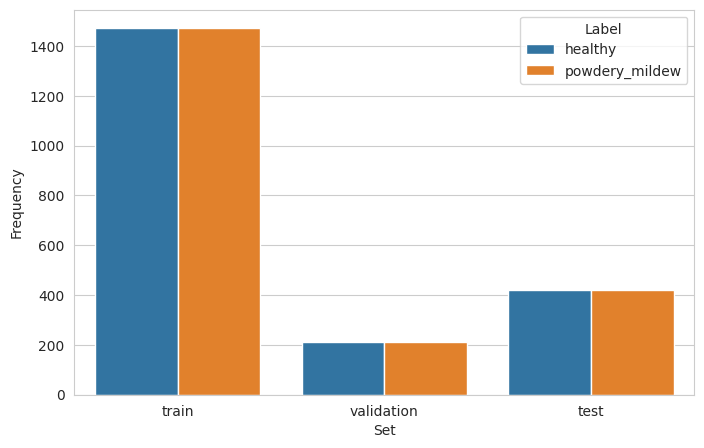

In [15]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

# Image data augmentation

Because our dataset only shows a limited number of images, we need to augment the images to increase the learning capacity of the ML model. 

Import ImageDataGenerator form Tensorflow

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Here we initialize the ImageDataGenerator

In [17]:
augmented_image_data = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.12, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

### Augment training image dataset

In [18]:
batch_size = 20 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment validation image dataset

In [19]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment test image dataset

In [20]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training images

(20, 256, 256, 3)


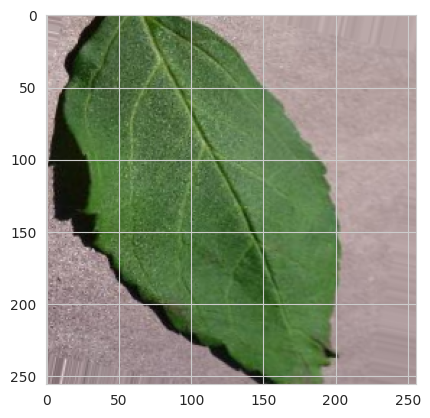

(20, 256, 256, 3)


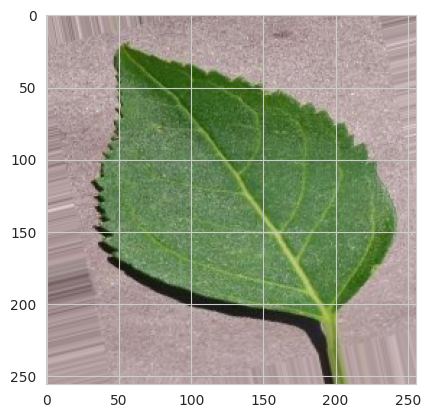

(20, 256, 256, 3)


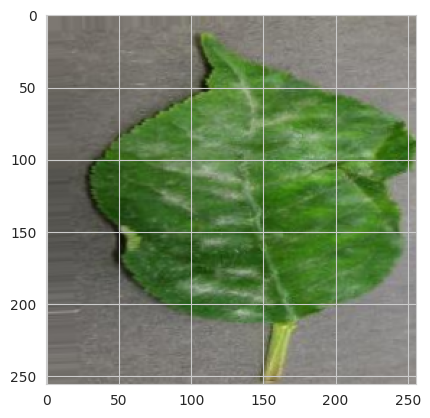

In [21]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

# Plot augmented validation images

(20, 256, 256, 3)


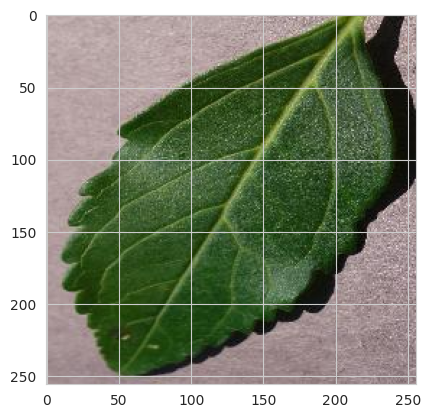

(20, 256, 256, 3)


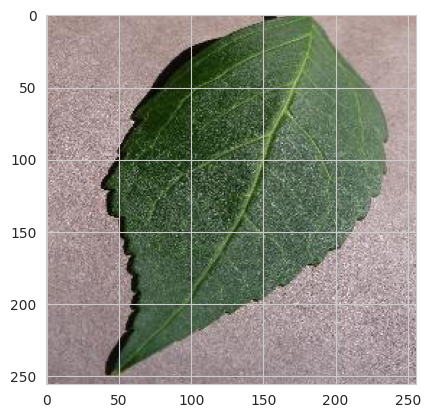

(20, 256, 256, 3)


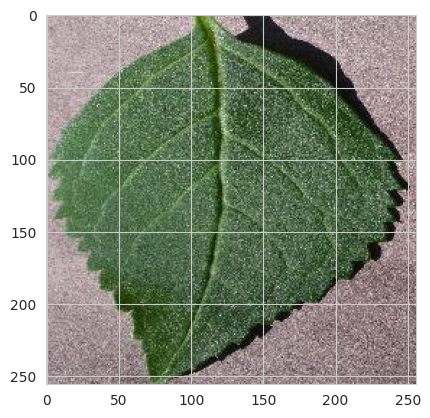

In [22]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

# Plot augmented test images

(20, 256, 256, 3)


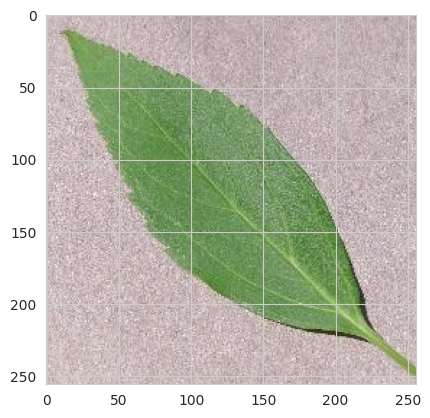

(20, 256, 256, 3)


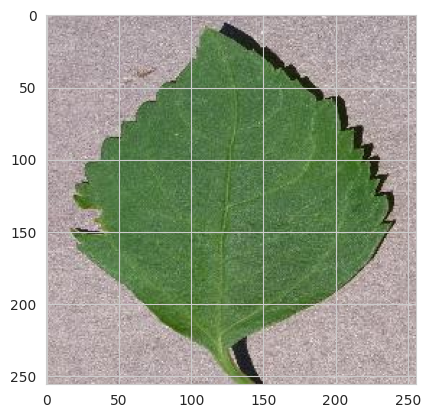

(20, 256, 256, 3)


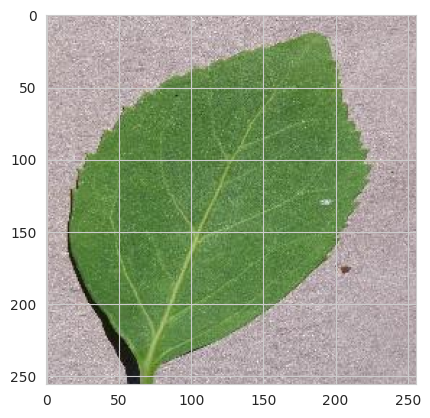

In [23]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Save class indices

In [24]:

joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

## Create the ML Model

- Import the required packages


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import keras_tuner
from tensorflow import keras


- Contsruct function to create model

In [26]:
def build_tf_model():
    
    # Convolution layers to filter the dominannt pixel values from the non-dominant, Maxpooling then reduces the image to only the dominant pixel values. The outcome being the complexity is reduced and the accuracy increased
    # The activation types used here are relu (rectified linerar activation function) and sigmoid (logistic regression classification function) 
    # https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
    model = Sequential()
    
    # Convolution layers (filtering the dominant from non-dominant)
    model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    # Max pooling layers (reducing image to only the dominant pixel values)
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # The Flatten layer transforms the matrix into a vector (a simgle list f all values)
    model.add(Flatten())
    # The Vector produced from the Flatten is fed to the Dense layer which peforms the mathematical calculation and provides the output 
    model.add(Dense(128, activation = 'relu'))
    
    # Dropout layer 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(

        loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )
    return model



    

## Build function to create Keras tuning model

In [33]:
def build_tf_model(units, activation, dropout, lr):
    model = keras.Sequential()
    model.add(Flatten())
    model.add(Dense(units=units, activation=activation))
    if dropout:
        model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=32, max_value=512, step=32)
    activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = build_tf_model(
        units=units, activation=activation, dropout=dropout, lr=lr
    )
    return model


build_model(keras_tuner.HyperParameters())

## Initialise the tuner

- Set path for the search results

In [34]:
tune_path = my_data_dir + '/tune'

- Initialise the tuner

In [38]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="tune_path",
    project_name="mildew-detection",
)

- Print a summary of the search space

In [39]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


- Prepare the MNIST dataset to inform the tuning search

In [40]:
from tensorflow import keras
import numpy as np

(x, y), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x[:-10000]
x_val = x[-10000:]
y_train = y[:-10000]
y_val = y[-10000:]

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_val = np.expand_dims(x_val, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

- Begin the search for the best hyperparameter config.

In [41]:
tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.9579499959945679

Best val_accuracy So Far: 0.9718999862670898
Total elapsed time: 00h 01m 16s
INFO:tensorflow:Oracle triggered exit


- Query the search results

In [54]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 28, 28))
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 352)               276320    
_________________________________________________________________
dropout (Dropout)            (None, 352)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3530      
Total params: 279,850
Trainable params: 279,850
Non-trainable params: 0
_________________________________________________________________
